In [152]:
import pandas as pd
import pandas as pd
import numpy as np
from keras.utils import np_utils
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import MinMaxScaler
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import roc_auc_score,confusion_matrix, accuracy_score, make_scorer, f1_score,precision_score,recall_score, plot_confusion_matrix
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from keras.utils import np_utils

In [153]:
def print_distribution(arr, print_nl=True):
    arr = np.unique(arr, return_counts=True)[1] / len(arr)
    for i in range(arr.shape[0]):
        print("Classe %d: %.2f%%" %(i, arr[i]*100))

    if print_nl:
        print("\n")

In [154]:
def taste(quality):
  if quality <= 5:
    return 0
  elif quality == 6:
    return 1
  else:
    return 2

In [155]:
data = pd.read_csv("wine_quality.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed.acidity         6497 non-null   float64
 1   volatile.acidity      6497 non-null   float64
 2   citric.acid           6497 non-null   float64
 3   residual.sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free.sulfur.dioxide   6497 non-null   float64
 6   total.sulfur.dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


In [156]:
new_data = data
new_data["taste"] = data["quality"].apply(taste)

In [157]:
new_data

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,taste
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,2


## Divisão de base de dados e separação de base

In [158]:
X = new_data.iloc[:, 0:11].values
y = new_data.iloc[:, 12].values

In [159]:
print("Proporções por classe no dataset em geral:")
print_distribution(y)

kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=199)
fold = 0
for train, test in kf.split(X, y):
    print("Fold %d" %(fold))
    print_distribution(y[train], print_nl=(fold != 2))
    fold += 1

Proporções por classe no dataset em geral:
Classe 0: 36.69%
Classe 1: 43.65%
Classe 2: 19.66%


Fold 0
Classe 0: 36.69%
Classe 1: 43.66%
Classe 2: 19.65%


Fold 1
Classe 0: 36.69%
Classe 1: 43.66%
Classe 2: 19.65%


Fold 2
Classe 0: 36.69%
Classe 1: 43.66%
Classe 2: 19.65%
Fold 3
Classe 0: 36.69%
Classe 1: 43.66%
Classe 2: 19.65%


Fold 4
Classe 0: 36.70%
Classe 1: 43.65%
Classe 2: 19.65%


Fold 5
Classe 0: 36.70%
Classe 1: 43.65%
Classe 2: 19.65%


Fold 6
Classe 0: 36.70%
Classe 1: 43.65%
Classe 2: 19.65%


Fold 7
Classe 0: 36.70%
Classe 1: 43.64%
Classe 2: 19.66%


Fold 8
Classe 0: 36.70%
Classe 1: 43.64%
Classe 2: 19.66%


Fold 9
Classe 0: 36.70%
Classe 1: 43.64%
Classe 2: 19.66%




In [160]:
kf_accuracy = list()
kf_conf_mat = list()
kf_precision = list()
kf_f1 = list()
kf_recall = list()
kf_roc = list()

## Laço para execução do gridsearch em cada fold 

In [161]:
for train_ix, test_ix in kf.split(X,y):
    X_train, X_test = X[train_ix, :], X[test_ix, :]
    y_train, y_test = y[train_ix], y[test_ix]
    model = DecisionTreeClassifier(random_state=199)
    # parâmetros para teste do gridsearch
    parameters = dict()
    parameters["max_leaf_nodes"] = list(range(2, 10))
    parameters["min_samples_split"] = [2,4,6]
    parameters["max_depth"] = [4,6,8]
    search = GridSearchCV(model, parameters, scoring="accuracy", cv=10, refit=True)
    # executar e salvar melhores parâmetros do grisearch
    result = search.fit(X_train, y_train)
    best_model = result.best_estimator_
    # teste dos melhores parâmetros
    predicted_y = best_model.predict(X_test)
    #transformação de itens para cálculo do ROC
    y_test_dummy = np_utils.to_categorical(y_test)
    y_test_dummy
    predicted_y_dummy = np_utils.to_categorical(predicted_y)
    predicted_y_dummy
    # métricas do modelo
    acc = accuracy_score(y_test, predicted_y)
    conf_mat = confusion_matrix(y_test, predicted_y)
    f1 = f1_score(y_test, predicted_y, average = "macro")
    recall = recall_score(y_test, predicted_y, average = "macro")
    roc = roc_auc_score(y_test_dummy,predicted_y_dummy,multi_class="ovo",average = "macro")
    #armazenamento de métricas
    kf_accuracy.append(acc)
    kf_conf_mat.append(conf_mat)
    kf_f1.append(f1)
    kf_recall.append(recall)
    kf_roc.append(roc)
    #métricas
    print(">acc=%.3f,>f1=%.3f,>rec=%.3f,>roc=%.3f, est=%.3f, cfg=%s" % (acc,f1,recall,roc, result.best_score_, result.best_params_))
    print(conf_mat)

>acc=0.545,>f1=0.527,>rec=0.522,>roc=0.638, est=0.528, cfg={'max_depth': 4, 'max_leaf_nodes': 5, 'min_samples_split': 2}
[[148  84   7]
 [ 79 155  49]
 [ 10  67  51]]
>acc=0.515,>f1=0.504,>rec=0.504,>roc=0.622, est=0.531, cfg={'max_depth': 4, 'max_leaf_nodes': 5, 'min_samples_split': 2}
[[156  74   9]
 [111 126  46]
 [ 11  64  53]]
>acc=0.543,>f1=0.533,>rec=0.535,>roc=0.646, est=0.536, cfg={'max_depth': 4, 'max_leaf_nodes': 5, 'min_samples_split': 2}
[[164  71   4]
 [ 97 130  56]
 [ 11  58  59]]
>acc=0.545,>f1=0.529,>rec=0.524,>roc=0.640, est=0.532, cfg={'max_depth': 4, 'max_leaf_nodes': 5, 'min_samples_split': 2}
[[137  93   9]
 [ 57 163  63]
 [  6  68  54]]
>acc=0.560,>f1=0.548,>rec=0.548,>roc=0.657, est=0.539, cfg={'max_depth': 6, 'max_leaf_nodes': 9, 'min_samples_split': 2}
[[155  79   4]
 [ 72 149  63]
 [ 14  54  60]]
>acc=0.582,>f1=0.578,>rec=0.573,>roc=0.673, est=0.538, cfg={'max_depth': 4, 'max_leaf_nodes': 5, 'min_samples_split': 2}
[[129  99  10]
 [ 61 179  44]
 [  5  53  70]

In [170]:
print("Accuracy: %.4f (%.4f)" % (np.mean(kf_accuracy), np.std(kf_accuracy)))
print("F1-score: %.4f (%.4f)" % (np.mean(kf_f1), np.std(kf_f1)))
print("Recall: %.4f (%.4f)" % (np.mean(kf_recall), np.std(kf_recall)))
print("ROC: %.4f (%.4f)" % (np.mean(kf_roc), np.std(kf_roc)))

Accuracy: 0.5479 (0.0222)
F1-score: 0.5356 (0.0224)
Recall: 0.5327 (0.0230)
ROC: 0.6451 (0.0173)


In [173]:
kf_accuracy

[0.5446153846153846,
 0.5153846153846153,
 0.5430769230769231,
 0.5446153846153846,
 0.56,
 0.5815384615384616,
 0.5707692307692308,
 0.5115562403697997,
 0.5362095531587057,
 0.5716486902927581]

In [163]:
kf_conf_mat

[array([[148,  84,   7],
        [ 79, 155,  49],
        [ 10,  67,  51]], dtype=int64),
 array([[156,  74,   9],
        [111, 126,  46],
        [ 11,  64,  53]], dtype=int64),
 array([[164,  71,   4],
        [ 97, 130,  56],
        [ 11,  58,  59]], dtype=int64),
 array([[137,  93,   9],
        [ 57, 163,  63],
        [  6,  68,  54]], dtype=int64),
 array([[155,  79,   4],
        [ 72, 149,  63],
        [ 14,  54,  60]], dtype=int64),
 array([[129,  99,  10],
        [ 61, 179,  44],
        [  5,  53,  70]], dtype=int64),
 array([[170,  62,   6],
        [ 94, 139,  51],
        [  7,  59,  62]], dtype=int64),
 array([[137,  92,   9],
        [102, 133,  49],
        [  5,  60,  62]], dtype=int64),
 array([[123, 106,   9],
        [ 55, 179,  50],
        [  6,  75,  46]], dtype=int64),
 array([[135,  92,  11],
        [ 54, 182,  48],
        [  6,  67,  54]], dtype=int64)]

In [164]:
conf_mat_mean = np.mean(kf_conf_mat,axis=0)

Confusion matrix, without normalization
[[145.4  85.2   7.8]
 [ 78.2 153.5  51.9]
 [  8.1  62.5  57.1]]


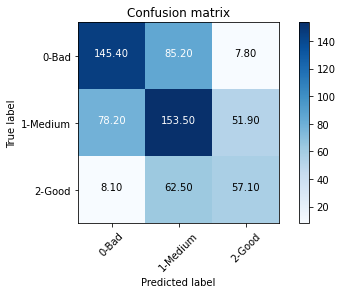

In [172]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
plot_confusion_matrix(conf_mat_mean,["0-Bad","1-Medium","2-Good"])
plt.savefig('MC_DT.png', transparent=True, dpi=300, bbox_inches="tight")